In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings('ignore')

In [2]:
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)

# Step 3: Preprocess the data (you may not need to preprocess in this case)
# For the Iris dataset, there's no need for preprocessing as the data is clean.

# Step 4: Implement K-Means clustering for various numbers of clusters
wcss = []

In [3]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS value

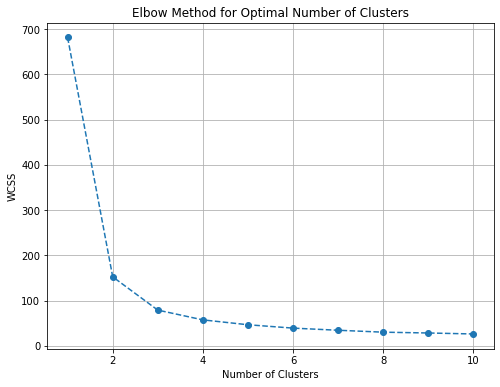

In [4]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

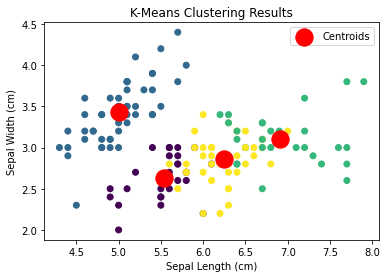

In [5]:
optimal_num_clusters = 4
kmeans = KMeans(n_clusters=optimal_num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(data)

# Add the cluster labels to the dataset
data['Cluster'] = cluster_labels

# Visualize the clusters
plt.scatter(data['sepal length (cm)'], data['sepal width (cm)'], c=data['Cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('K-Means Clustering Results')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()